# Pyspark Notes
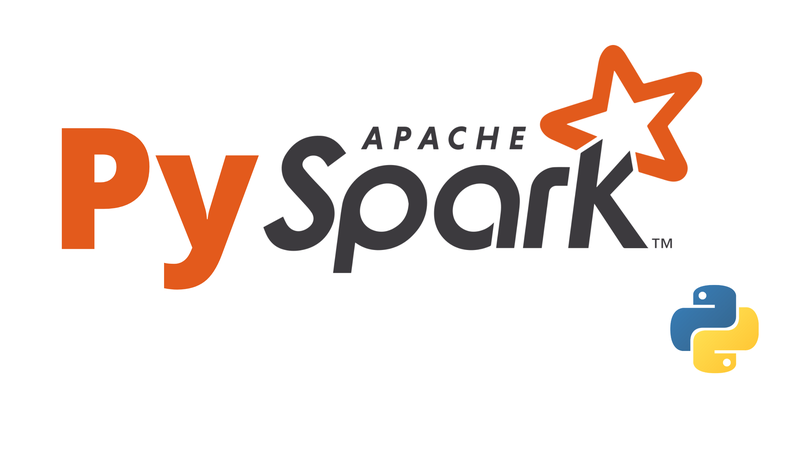
<b>Notes Created By:</b> <i>Mr. Kamal Jit Singh</i>

### Read, write data in  PySpark


# Doubt and Questions

- How to change the data type of the multiple column at once

In [169]:
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *

In [131]:
spark = SparkSession.builder.appName("practice").getOrCreate()

In [132]:
spark

In [4]:
data = [(1, "kamal"), (2, "chanda"), (3, "somil"), (4, "durga"), (5, "aman")]

In [5]:
# without columns
df = spark.createDataFrame(data)
df.show()

+---+------+
| _1|    _2|
+---+------+
|  1| kamal|
|  2|chanda|
|  3| somil|
|  4| durga|
|  5|  aman|
+---+------+



In [6]:
# with columns
df = spark.createDataFrame(data=data, schema=['id', 'name'])
df.show()

+---+------+
| id|  name|
+---+------+
|  1| kamal|
|  2|chanda|
|  3| somil|
|  4| durga|
|  5|  aman|
+---+------+



In [7]:
data = [(1, "kamal"), (2, "chanda"), (3, "somil"), (4, "durga"), (5, "aman")]
columns = ['id', 'name']

In [8]:
df = spark.createDataFrame(data=data, schema=columns)
df.show()

+---+------+
| id|  name|
+---+------+
|  1| kamal|
|  2|chanda|
|  3| somil|
|  4| durga|
|  5|  aman|
+---+------+



In [9]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)



In [10]:
schema1 = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
                    .add(field='name', data_type=StringType(), nullable=True)

In [11]:
schema2 = StructType([
    StructField(name="id", dataType=IntegerType(), nullable=True),
    StructField(name='name', dataType=StringType(), nullable=True)
])

In [12]:
df = spark.createDataFrame(data=data, schema=schema1)
df.show()

+---+------+
| id|  name|
+---+------+
|  1| kamal|
|  2|chanda|
|  3| somil|
|  4| durga|
|  5|  aman|
+---+------+



In [13]:
df = spark.createDataFrame(data=data, schema=schema2)
df.show()

+---+------+
| id|  name|
+---+------+
|  1| kamal|
|  2|chanda|
|  3| somil|
|  4| durga|
|  5|  aman|
+---+------+



In [14]:
data = [{'id':1, "name":"kamal", "salary": 8000},
    {"id":2, "name":"chanda", "salary": 9500},
    {"id": 3, "name":"durga", "salary":15000},
    {"id":4, "name":"somil", "salary":15500}]

In [15]:
data

[{'id': 1, 'name': 'kamal', 'salary': 8000},
 {'id': 2, 'name': 'chanda', 'salary': 9500},
 {'id': 3, 'name': 'durga', 'salary': 15000},
 {'id': 4, 'name': 'somil', 'salary': 15500}]

In [16]:
type(data)

list

In [17]:
df = spark.createDataFrame(data)
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  8000|
|  2|chanda|  9500|
|  3| durga| 15000|
|  4| somil| 15500|
+---+------+------+



In [18]:
data = {"id":[1, 2, 3, 4], "name": ["kamal", "chanda", "durga", "somil"], "salary": [5000, 6500, 7000, 7500]}

schema = StructType([
    StructField(name="id", dataType=IntegerType(), nullable=True),
    StructField(name="name", dataType=StringType(), nullable=True),
    StructField(name='salary', dataType=IntegerType(), nullable=True)
])

In [19]:
 type(data)

dict

In [20]:
data

{'id': [1, 2, 3, 4],
 'name': ['kamal', 'chanda', 'durga', 'somil'],
 'salary': [5000, 6500, 7000, 7500]}

In [21]:
schema = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
                    .add(field="name", data_type=StringType(), nullable=True)\
                    .add(field="salary", data_type=IntegerType(), nullable=True)

In [22]:
# it shows error
# spark.createDataFrame(data=data, schema=schema)

In [23]:
import pandas as pd

In [24]:
pd.DataFrame(data)

,id,name,salary
0,1,kamal,5000
1,2,chanda,6500
2,3,durga,7000
3,4,somil,7500


In [25]:
data = [(1, "kamal", 5000), (2, "chanda", 6000), (3, "durga", 7000), (4, "somil", 8000)]

In [26]:
df = spark.createDataFrame(data)
df.show()

+---+------+----+
| _1|    _2|  _3|
+---+------+----+
|  1| kamal|5000|
|  2|chanda|6000|
|  3| durga|7000|
|  4| somil|8000|
+---+------+----+



In [27]:
df = spark.createDataFrame(data=data, schema=['id', "name", "salary"])
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



In [28]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



In [29]:
data = [(1, "kamal", 5000), (2, "chanda", 6000), (3, "durga", 7000), (4, "somil", 8000)]

schema = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
                    .add(field="name", data_type=StringType(), nullable=True)\
                    .add(field="salary", data_type=IntegerType(), nullable=True)

df = spark.createDataFrame(data=data, schema=schema)
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



In [30]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: integer (nullable = true)



In [31]:
data = {"id":(1, 2, 3, 4), "name": ("kamal", "chanda", "durga", "somil"), "salary": (5000, 6500, 7000, 7500)}

schema = StructType([
    StructField(name="id", dataType=IntegerType(), nullable=True),
    StructField(name="name", dataType=StringType(), nullable=True),
    StructField(name='salary', dataType=IntegerType(), nullable=True)
])

In [32]:
# it will show error
# spark.createDataFrame(data=data, schema=schema).show()

In [33]:
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



# write csv file

In [34]:
# write a csv file
# df.write.csv("C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\csv", header=True, mode="append" )

In [35]:
# read one csv file
spark.read.csv(path="C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\csv\\part-00000-131e5f66-c5c2-4696-b2c8-452e4dd652a8-c000.csv", header=True).show()

+---+-----+------+
| id| name|salary|
+---+-----+------+
|  1|kamal|  5000|
+---+-----+------+



In [36]:
# read multiple csv file
spark.read.csv(path="C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\csv\\", header=True).show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



# write json file

In [37]:
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



In [38]:
display(df)

DataFrame[id: int, name: string, salary: int]

In [39]:
# df.write.json("C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\json", mode="append")

In [40]:
# read single json file
spark.read.json("C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\json\\part-00000-6bf35e10-c054-4ba0-b3a4-a47764b4b803-c000.json").show()

+---+-----+------+
| id| name|salary|
+---+-----+------+
|  1|kamal|  5000|
+---+-----+------+



In [41]:
# read multiple json file
spark.read.json(path="C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\json\\").show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



# parquet file

In [119]:
data = [(1, "kamal", 5000), (2, "chanda", 6000), (3, "durga", 7000), (4, "somil", 8000)]

schema = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
                    .add(field="name", data_type=StringType(), nullable=True)\
                    .add(field="salary", data_type=IntegerType(), nullable=True)

df = spark.createDataFrame(data=data, schema=schema)
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+



In [108]:
df.write.parquet(path="C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet", mode="append")

In [109]:
# read parquet file
df = spark.read.format("parquet")\
        .option("header", "true")\
        .option('inferSchema', "false")\
        .schema(schema)\
        .load('C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet')

df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  4| somil|  8000|
|  3| durga|  7000|
+---+------+------+



In [110]:
df = spark.read.parquet("C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet", header=True)
df.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  4| somil|  8000|
|  3| durga|  7000|
+---+------+------+



In [111]:
file_path = 'C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet'
df = spark.read.format('parquet').option('header', 'true').option('inferSchema', 'false').schema(schema).load(file_path)
df.printSchema()

df.show(5)

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: integer (nullable = true)

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  4| somil|  8000|
|  3| durga|  7000|
+---+------+------+



In [112]:
# read single parque file
# file_path = 'C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet\\part-00000-7d1f7ef9-b20d-4215-9a00-061a0a87a2b3-c000.snappy.parquet'
# df = spark.read.parquet(file_path, header=True)
# df.show()

In [113]:
file_path = 'C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet'
df = spark.read.format('parquet').option('header', 'true').option('inferSchema', 'false').schema(schema).load(file_path)
df.printSchema()

df.show(5)

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: integer (nullable = true)

+---+------+------+
| id|  name|salary|
+---+------+------+
|  2|chanda|  6000|
|  1| kamal|  5000|
|  4| somil|  8000|
|  3| durga|  7000|
+---+------+------+



In [105]:
# mode = 'ignore' it will ignore the already existing and error file
df.write.parquet('C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet', mode='ignore')

In [118]:
# mode='append' it will append the same file mean it will make duplication of the file
df.write.parquet('C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet', mode='append')

In [120]:
# it will overwritw the the current processed file
df.write.parquet('C:\\Users\\kamal\\Desktop\\Data\\pyspark_important\\parquet', mode="overwrite")

# withColumn()
- Add new column 
- or change value in column or 
- change column data type in dataframe

In [123]:
data = [(1, "kamal", 5000), (2, "chanda", 6000), (3, "durga", 7000), (4, "somil", 8000)]

# schema = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
#                     .add(field="name", data_type=StringType(), nullable=True)\
#                     .add(field="salary", data_type=IntegerType(), nullable=True)

df = spark.createDataFrame(data=data, schema=['id', 'name', 'salary'])
df.show()
df.printSchema()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



In [174]:
# change the data type of the salay column
df_1 = df.withColumn(colName="salary", col=col('salary').cast('Integer'))
df.printSchema(),
df_1.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: integer (nullable = true)



In [176]:
# change the data type of the column id
df_2 = df.withColumn(colName="id", col=col("id").cast("integer"))
df.printSchema(),
df_2.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



In [133]:
from pyspark.sql.functions import col, lit

In [150]:
# transformation on the salary column with multiple of two
df1 = df.withColumn(colName="salary", col=col('salary')*2)

In [151]:
df1.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal| 10000|
|  2|chanda| 12000|
|  3| durga| 14000|
|  4| somil| 16000|
+---+------+------+



In [153]:
# transformation on salary column
df2 = df.withColumn(colName="salary", col=col("salary")/10)
df.show(), 
df2.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal| 500.0|
|  2|chanda| 600.0|
|  3| durga| 700.0|
|  4| somil| 800.0|
+---+------+------+



In [159]:
# create a new col
df3 = df.withColumn(colName="contryName", col=lit("India"))
df.show(),
df3.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

+---+------+------+----------+
| id|  name|salary|contryName|
+---+------+------+----------+
|  1| kamal|  5000|     India|
|  2|chanda|  6000|     India|
|  3| durga|  7000|     India|
|  4| somil|  8000|     India|
+---+------+------+----------+



In [162]:
# create a new with to copy the value salary column from the same colums
df4 = df.withColumn(colName="copiedColumn", col=col('salary'))
df.show(),
df4.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

+---+------+------+------------+
| id|  name|salary|copiedColumn|
+---+------+------+------------+
|  1| kamal|  5000|        5000|
|  2|chanda|  6000|        6000|
|  3| durga|  7000|        7000|
|  4| somil|  8000|        8000|
+---+------+------+------------+



# withColumnRenamed()

### rename the column name

In [183]:
data = [(1, "kamal", 5000), (2, "chanda", 6000), (3, "durga", 7000), (4, "somil", 8000)]

schema = StructType().add(field="id", data_type=IntegerType(), nullable=True)\
                    .add(field="name", data_type=StringType(), nullable=True)\
                    .add(field="salary", data_type=IntegerType(), nullable=True)

df = spark.createDataFrame(data=data, schema=schema)
df.show()
df.printSchema()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: integer (nullable = true)



In [189]:
# rename single column
df1 = df.withColumnRenamed("salary", "EmployeeSalary")
df.show(),
df1.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

+---+------+--------------+
| id|  name|EmployeeSalary|
+---+------+--------------+
|  1| kamal|          5000|
|  2|chanda|          6000|
|  3| durga|          7000|
|  4| somil|          8000|
+---+------+--------------+



In [197]:
# renme multiple columns
df2 = df.withColumnsRenamed({"id":"Emp_id", "name":"Emp_name", "salary":" Emp_salary"})
df.show(),
df2.show()

+---+------+------+
| id|  name|salary|
+---+------+------+
|  1| kamal|  5000|
|  2|chanda|  6000|
|  3| durga|  7000|
|  4| somil|  8000|
+---+------+------+

+------+--------+-----------+
|Emp_id|Emp_name| Emp_salary|
+------+--------+-----------+
|     1|   kamal|       5000|
|     2|  chanda|       6000|
|     3|   durga|       7000|
|     4|   somil|       8000|
+------+--------+-----------+

